### 1. Defining the Question

##### a) Specifying the Question

> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to make a prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly

##### b) Defining the Metric for Success

> The project will be considered a success if the models created are able to predict results of a game to an accuracy of at least 80%

##### c) Understanding the Context

> FIFA is a non-profit organization that describes itself as an international governing body of association football, futsal and beach soccer. It is the highest governing body of association football. It is responsible for the rules of association football, the regulation of the sport, the promotion of football across the world.


> We are supposed to predict the result of a game between team 1 and 2 based on who's home and who's away, and on whether or not the game is friendly


> This will be done by using machine learning models to calculate the points of each team and predict the possible winner of the game

##### d) Recording the Experimental Design

> Perform your EDA

> Perform any necessary feature engineering 

> Check of multicollinearity

> Start building the model

> Cross-validate the model

> Compute RMSE

> Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

> Perform appropriate regressions on the data including your justification

> Challenge your solution by providing insights on how you can make improvements.

##### e) Data Relevance

> The data provided for this project is relevant and has been provided by Mchezopesa Ltd and is available on their website.

### 2. Reading Data

In [55]:
# let's import the libraries we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

In [56]:
# let's import the datasets
data = pd.read_csv('results.csv')

In [57]:
# let's import the second dataset
fifa = pd.read_csv('fifa_ranking.csv')

### 3. Checking Data

In [58]:
# let's preview the datasets
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


> These are the top 5 rows of the first dataset.

In [59]:
# let's preview the datasets
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


> These are the top 5 rows of the second dataset.

In [60]:
# let's check the tail of the datasets
data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


> These are the last 5 rows of the first dataset.

In [61]:
# let's check the tail of the datasets
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


> These are the last 5 rows of the second dataset.

In [62]:
# let's check the shape of the datasets
data.shape

(40839, 9)

> The first dataset has 40839 rows and 9 columns.

In [63]:
# let's check the shape of the datasets
fifa.shape

(57793, 16)

> The second dataset has 57793 rows and 16 columns.

In [64]:
# let's check the columns of the datasets
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

> These are the columns of the first dataset.

In [65]:
# let's check the columns of the datasets
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

> These are the columns of the second dataset.

In [66]:
# let's see a description of the datasets
data.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [67]:
# let's see a description of the datasets
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


### 4. External Data Source Validation

> The teams that are playing in the game have been verified from the FIFA website and the matches actually played.

### 5. Tidying the Dataset

In [68]:
# let's check for null values
data.isnull().sum().any()

False

> The first dataset does not have any null values

In [69]:
# let's check for null values
fifa.isnull().sum().any()

False

> The second dataset has no null values

In [70]:
# let's check for anomalies
data.duplicated().sum().any()

False

> There is no duplicate data in the first dataset

In [71]:
# let's check for anomalies
fifa.duplicated().sum().any()

True

In [101]:
# let's drop the duplicated data
fifa.drop_duplicates(inplace=True)

In [102]:
fifa.duplicated().sum().any()

False

> The second dataset however has some duplicate data

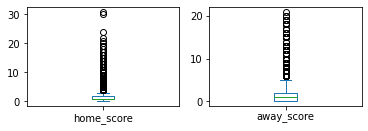

In [72]:
# Checking for Outlier
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [94]:
# let's get all numerical columns from the fifa dataset and store it in a variable
numerical_columns_fifa = fifa.select_dtypes(include=['int64', 'float64'])
numerical_columns

,home_score,away_score
0,0,0
1,4,2
2,2,1
3,2,2
4,3,0
...,...,...
40834,8,1
40835,4,4
40836,0,1
40837,0,1


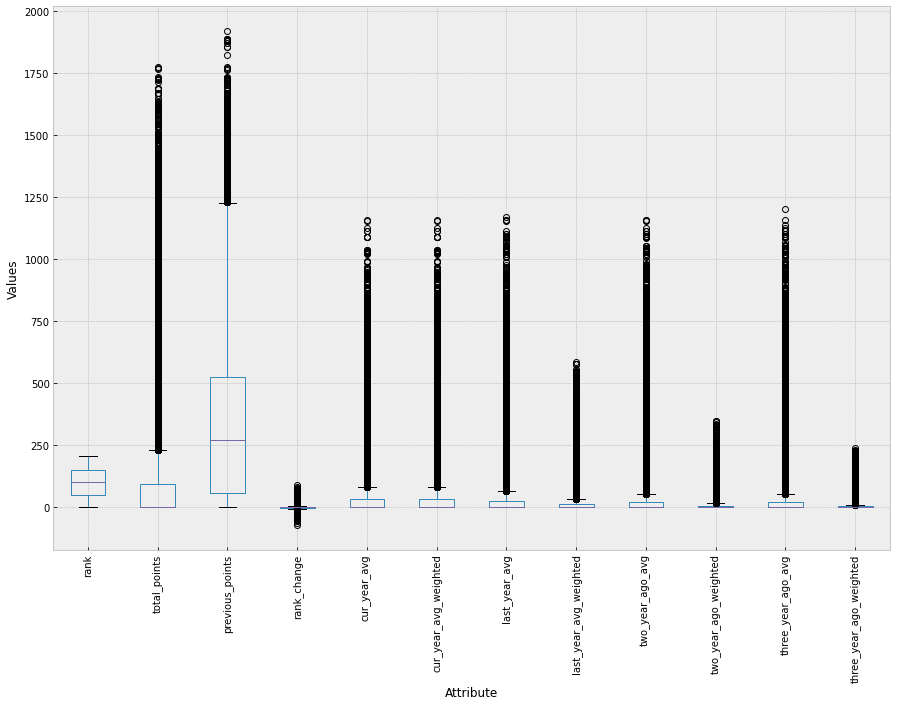

In [100]:
# let's see all the outliers in the fifa dataset
fifa.boxplot()
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.xlabel('Attribute')
plt.show()

> We wont be dropping any outliers for both datasets as this are crucial datasets

In [ ]:
# More data cleaning procedures
#

> The first dataset has no missing values while the second dataset has missing values.

### 6. Exploratory Analysis

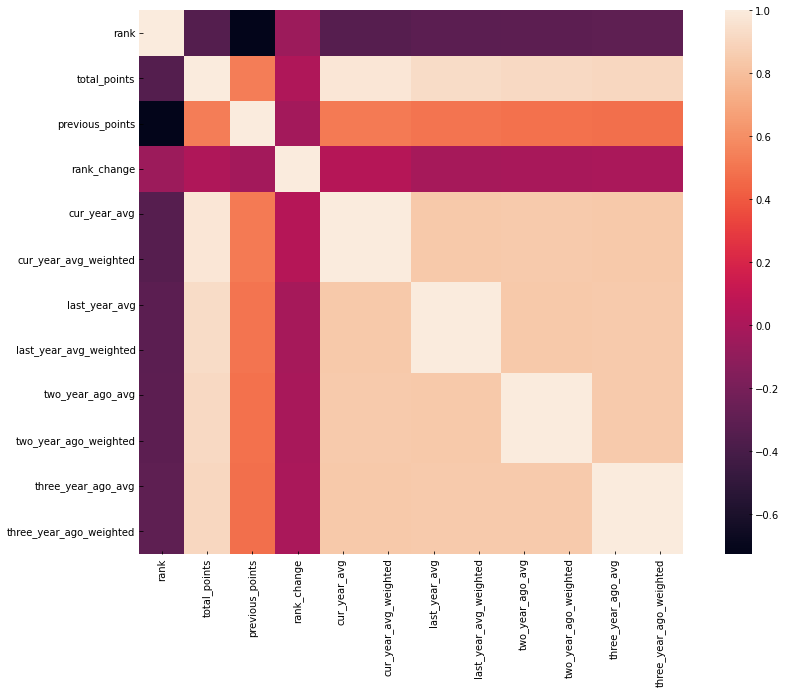

In [103]:
# let's plot the correlation matrix using a heatmap
corr = fifa.corr()
sns.heatmap(corr, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.show()

In [ ]:
# Ploting the univariate summaries and recording our observations
#

### 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

### 8. Challenging the solution

In [ ]:
# Reviewing the Solution 
#

### 9. Follow up questions

##### a). Did we have the right data?

##### b). Do we need other data to answer our question?

##### c). Did we have the right question?